In [1]:
print("Hello world!")

Hello world!


In [3]:
%pip list

Package                 Version
----------------------- -----------
asttokens               3.0.1
colorama                0.4.6
comm                    0.2.3
debugpy                 1.8.19
decorator               5.2.1
executing               2.2.1
ipykernel               7.1.0
ipython                 9.9.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
jupyter_client          8.8.0
jupyter_core            5.9.1
matplotlib-inline       0.2.1
nest-asyncio            1.6.0
packaging               25.0
parso                   0.8.5
pip                     25.3
platformdirs            4.5.1
prompt_toolkit          3.0.52
psutil                  7.2.2
pure_eval               0.2.3
Pygments                2.19.2
python-dateutil         2.9.0.post0
pyzmq                   27.1.0
setuptools              80.10.1
six                     1.17.0
stack-data              0.6.3
tornado                 6.5.4
traitlets               5.14.3
wcwidth                 0.5.0
wheel              

In [2]:
%pip install psycopg2-binary

  Using cached psycopg2_binary-2.9.11-cp313-cp313-win_amd64.whl.metadata (5.1 kB)
Using cached psycopg2_binary-2.9.11-cp313-cp313-win_amd64.whl (2.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import psycopg2

# database 연결
conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="4857"
)
cur = conn.cursor()

In [4]:
cur.execute("SELECT * from user_info")
rows = cur.fetchall()
for row in rows:
    print(row)

('jimin', '박지민', '9510131234567', 'SK', '01011111111')
('jungkuk', '전정국', '9709011234567', 'KT', '01022222222')
('sugar', '민윤기', '9309011234567', 'LG', '01033333333')
('test', '건우', '123456789ABCD', 'LG', '010        ')
('test2', '건우', '123456789ABCD', 'LG', '010        ')


In [6]:
query = "insert into user_info values('john','박건우','123456789ABCD','LG','010')"
cur.execute(query)

In [17]:
query = "update user_info set tel_co='KT' where user_id='john'"
cur.execute(query)

In [21]:
conn.rollback()

In [23]:
conn.commit()

In [22]:
query = "insert into user_info values(%s, %s, %s, %s, %s)"
cur.execute(query, ('jane', '김지은', '987654321ZYXW', 'SK', '011'))

C:\Users\yourk\AppData\Local\Temp\ipykernel_15240\1785294217.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\yourk\AppData\Local\Temp\ipykernel_15240\1785294217.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='breed_name', y='raw_weight_num', data=df, palette='Set3')


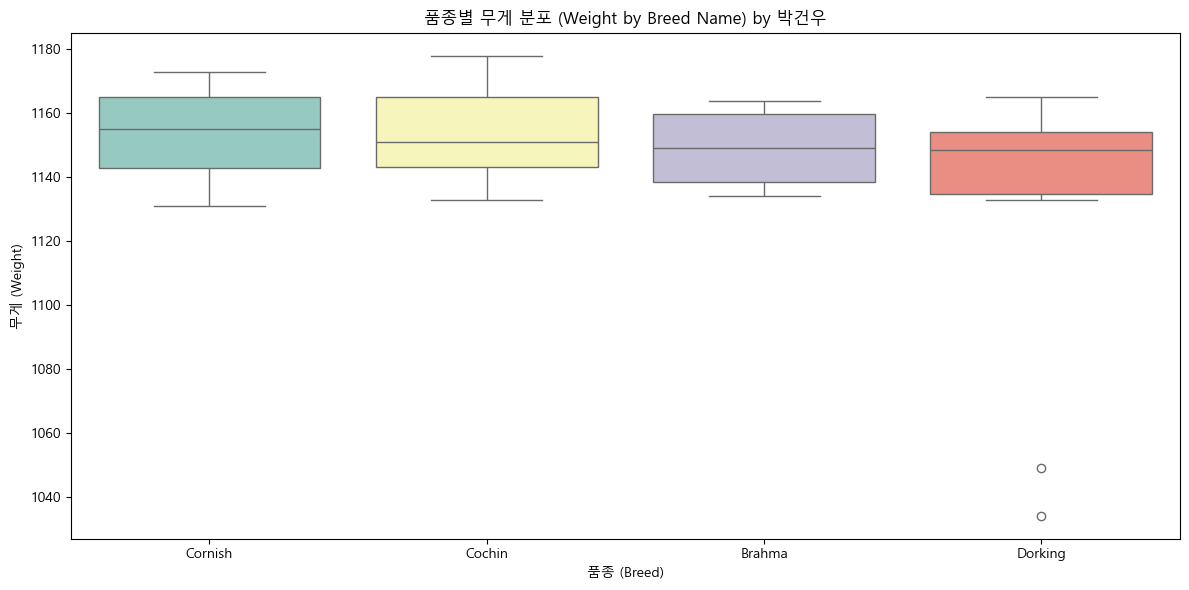

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

query = """
SELECT 
    C.code_desc AS breed_name,  -- 품종 코드 대신 품종명(설명)을 가져옴
    B.raw_weight
FROM fms.chick_info A
JOIN fms.prod_result B ON A.chick_no = B.chick_no
JOIN fms.master_code C ON A.breeds = C.code
"""

# DB에서 데이터 가져오기
df = pd.read_sql(query, conn)

# 2. 데이터 전처리 (단위 제거 및 숫자 변환)
def clean_numeric(val):
    if isinstance(val, str):
        # 'g', 'kg' 등 숫자와 점(.)을 제외한 문자 제거
        return float(re.sub(r'[^\d\.]', '', val))
    return float(val)

# raw_weight 컬럼 숫자 변환
df['raw_weight_num'] = df['raw_weight'].apply(clean_numeric)

# 3. 시각화 (Box Plot)
# 한글 폰트 설정 (품종명이 한글일 경우 필수)
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows
# plt.rcParams['font.family'] = 'AppleGothic' # Mac
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 6))

# x축을 'breed_name'(품종명)으로 설정
# palette='Set3'로 색상을 변경 (Set2, Pastel1, viridis 등 변경 가능)
sns.boxplot(x='breed_name', y='raw_weight_num', data=df, palette='Set3')

plt.title('품종별 무게 분포 (Weight by Breed Name) by 박건우')
plt.ylabel('무게 (Weight)')
plt.xlabel('품종 (Breed)')

plt.tight_layout()
plt.show()